In [32]:
import sys
import os

parent_module_path = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))


sys.path.append(parent_module_path)
parent_module_path

'/workspaces/line-detection'

In [33]:
import cv2
import matplotlib.pyplot as plt

In [34]:
image_path: str = "../../images/mask.png"

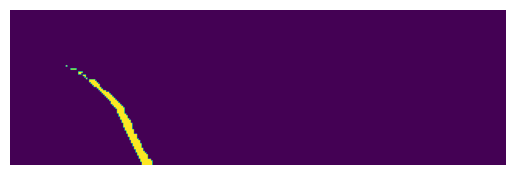

In [35]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
plt.axis("off")
plt.show()

In [36]:
# Check if the image is grayscale
if len(image.shape) == 3 and image.shape[2] == 3:
    print("The image is not in grayscale")
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    print("The image is already in grayscale")
    gray = image.copy()

The image is already in grayscale


# Run canny detection

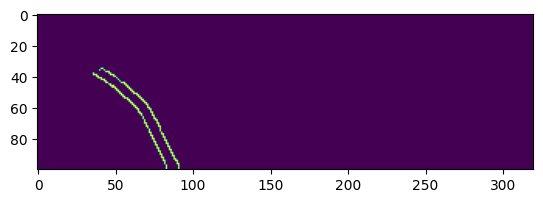

In [37]:
from src.project_utils.edge_detection import create_canny_edge_detection_img


canny_image = create_canny_edge_detection_img(
    image,lower_threshold=12, 
    upper_threshold=200,
    gaussian_kernel_size=(17,17)
)
plt.imshow(canny_image)

In [39]:
from src.project_utils.hough_transform import get_hough_lines

# Get lines using the default parameters
lines = get_hough_lines(canny_image, threshold=17 , min_line_length=40, max_line_gap=17)
lines


array([[[70, 57, 91, 98]],

       [[57, 45, 83, 99]],

       [[38, 39, 79, 72]]], dtype=int32)

In [43]:
import numpy as np

## Thin lines
rho: float = 1 # distance resolution in pixels of the Hough grid
theta: float = 0.04 # angular resolution in radians of the Hough grid
threshold: int = 1 # minimum number of votes (intersections in Hough grid cell)
min_line_length: int = 40 # minimum number of pixels making up a line
max_line_gap: int = 17 # maximum gap in pixels between connectable line segments

# ## Thick lines
# rho = 1  # distance resolution in pixels of the Hough grid
# theta = np.pi / 180  # angular resolution in radians of the Hough grid
# threshold = 50  # minimum number of votes (intersections in Hough grid cell)
# min_line_length = 200  # minimum number of pixels making up a line
# max_line_gap = 20  # maximum gap in pixels between connectable line segments

# Detect lines using HoughLin

In [44]:
lines = cv2.HoughLinesP(
    canny_image,
    rho=rho,
    theta=theta,
    threshold=threshold,
    minLineLength=min_line_length,
    maxLineGap=max_line_gap,
)

In [45]:
assert lines is not None

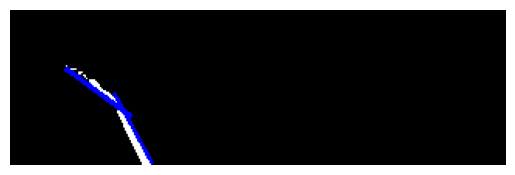

In [46]:


# Create a copy of the original image to draw lines on
line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Draw lines on the image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the image with lines
plt.imshow(line_image)
plt.axis("off")
plt.show()

In [47]:
for line in lines:
    print(line)
    

[[67 54 91 98]]
[[36 38 77 68]]
